<a href="https://colab.research.google.com/github/woodRock/grokking-deep-learning/blob/main/chapter_4_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 4 | Gradient Descent

We can think of a neural network as a bunch of knobs (parameters), some sensory infomraiton (input), and a prediction (output). The purpose of the network is to take an input, feed it through the parameters, and produce a prediction. There exists a desired output $y$, the real-world value we wish to predict. The the network gives a prediction $\hat{y}$, that aims to approximate that real-world value. Error measures the distance between the desired output $y$, and the newtworks predictiosn $\hat{y}$.

Error is a way to measure how much you missed. There are multiple ways to calculate this error, as you'll learn later. This one is mean squared error (SE). Squaring forces the error to be positive - we want errors to always be positive so they don't accidentally cancel each other out when you average them. The $(.)^2$ operation in $SE$ magnifies large errors and reduces small errors.

For a single instance, this is the loss function:

$ SE = |y - \hat{y}|^2 $

Over a set of instances, the Mean Squared Error (MSE) this gives the cost function:

$ MSE = \frac{1}{|T|} \sum_{i \in T} |y_i - \hat{y_i}|^2 $


In [1]:
# Parameters are a bunch of knobs.
knob_weight = 0.5
# Inputs are sensory data.
input = 0.5
# Goals are the desired output.
goal_pred = 0.8 

# Prediction for neuron is product of input and parameters. 
pred = input * knob_weight 
error = (pred - goal_pred) ** 2 
print(f"Goal: {goal_pred}, prediction: {pred}, error (SE): {error}")

Goal: 0.8, prediction: 0.25, error (SE): 0.30250000000000005


## Hot and Cold Learning

Hot and cold learning means wiggling the weights to see which direction reduces the error the most, moving the weights in that direction, and repeating until the error gets to 0. 

Hot and cold learning is a naive approach with limitations, those are its very ineffecient, and sometimes impossible to predict the desired output. Firstly, It is inefficient because the network has tomake multiple predictions to update a single parameter. Secondly, with fixed _step_amount_ unless the perfect _weight_ is excatly $n*$_step_amount_ away, the network will eventually overshoot by some number less than _step_amount_. 

For example, set the _step_amount_ to 10, to see the second limitation in actions. When we try this, the network never comes close to the desired output (goal) of 0.8. When fiddling with the step amount, we see any learning rate $\alpha \ge 0.2$ breaks the network.

Error: 0.30250000000000005 Prediction: 0.25
Error: 0.0024999999999999823 Prediction: 0.8499999999999999
Error: 0.0024999999999999823 Prediction: 0.8499999999999999
Error: 0.0024999999999999823 Prediction: 0.8499999999999999
Error: 0.0024999999999999823 Prediction: 0.8499999999999999
Error: 0.0024999999999999823 Prediction: 0.8499999999999999
Error: 0.0024999999999999823 Prediction: 0.8499999999999999
Error: 0.0024999999999999823 Prediction: 0.8499999999999999
Error: 0.0024999999999999823 Prediction: 0.8499999999999999
Error: 0.0024999999999999823 Prediction: 0.8499999999999999
Error: 0.0024999999999999823 Prediction: 0.8499999999999999
Error: 0.0024999999999999823 Prediction: 0.8499999999999999


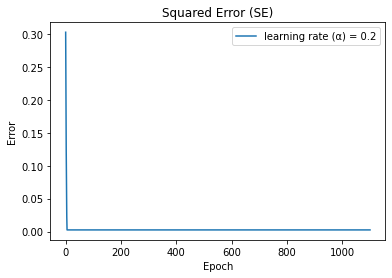

In [2]:
# User input, 
step_amount = 0.2 #@param {type: "float"} {allow-input: true}

# The maximum number of iterations to train the neuron for.
epochs = 1101
errors = []

# Input (sensory information)
input = 0.5
# Weight (knob)
weight = 0.5
# Output (desired prediction)
goal_prediction = 0.8

for iteration in range(epochs): 
    # For neuron, prediction is product of input and weight.
    prediction = input * weight 
    # Error is Squared Error (SE).
    error = (prediction - goal_prediction) ** 2 
    errors.append(error)

    # Each 100 epochs, print the error and prediction.
    if iteration % 100 == 0:
        print(f"Error: {error} Prediction: {prediction}")
    
    # Inefficient: two predictions are calcuated, i.e. up and down. 
    up_prediction = input * (weight + step_amount)
    up_error = (goal_prediction - up_prediction) ** 2
    down_prediction = input * (weight - step_amount)
    down_error = (goal_prediction - down_prediction) ** 2

    # Weight update is +/- step_amount by if up/down has less error.
    weight_update = - step_amount if (down_error < up_error) else step_amount
    # Update the weight.
    weight += weight_update

#  Plot the error curve for visualization.
import matplotlib.pyplot as plt
plt.plot(errors, label=f"learning rate (α) = {step_amount}")
plt.title("Squared Error (SE)")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.legend()

## Error as a Vector | Both Direction and Amount of Error

A vector $\vec{v}$ has direction $\theta$ and magnitude $|\vec{v}|$. If we scale our weight change to be proportionate to the error, by making an error a vector with direction and magnitude, the network converges with 1101 (hot and cold) / 20 (vector) = 1.8% of the epochs of the hot and cold method.

The pure error $\hat{y} - y$ is multiplied by the input $x$, this performs scaling, negative reversal, and stopping, transforming the pure error into the weight update $\Delta \beta$.

Where: 
- pure error $\hat{y} - y$ indicates the raw direction and amount you missed. 
- stopping - If the input is 0, you don't learn anything. 
- negative reversal - The negative reversal ensures the weight moves in the correct direction, even for negative inputs. 
- scaling - big inputs, correspond to big weights.
    

Error: 5.408208020258491e-06 Prediction: 0.7976744445781151


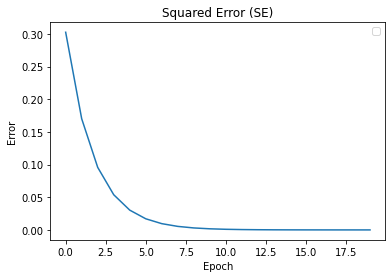

In [3]:
# This code snippet performs gradient desent on a single neuron for 20 iterations.

epochs = 20
input = 0.5
weight = 0.5
goal_prediction = 0.8
errors = []

# Perform gradient descent for a neuron for 20 epochs.
for iteration in range(epochs): 
    # For a neuron, the prediction is the product of input and weight.
    prediction = input * weight 
    error = (prediction - goal_prediction) ** 2
    # The pure error multiplied by input gives us the weight update.
    # Multiplying by input performs scaling, negative reversal and stopping.
    direction_and_amount = (prediction - goal_prediction) * input
    # Update the weight.
    weight = weight - direction_and_amount
    errors.append(error)

    if iteration == epochs - 1:
        print(f"Error: {error} Prediction: {prediction}")

# Here we give Squared Error (SE) to show the neuron learning, "reducing error", over 20 training epochs.
import matplotlib.pyplot as plt

plt.plot(errors)
plt.title("Squared Error (SE)")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.legend()

For any input and output, an exact relationshipis defined between error and weight, foudn by combining the prediction and error formulas. In this case: 

$ error = ((0.5 * weight) - 0.8)^2 $

$ error = ((input * weight) - goal)^2$ 

Alpha $\alpha$ is the learning rate, this determines the speed at which the neuron learns. 

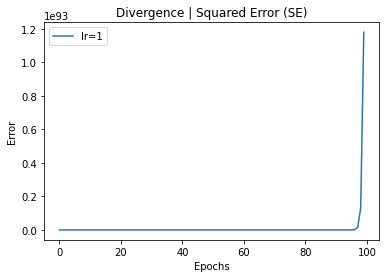

In [4]:
weight, goal_pred, input = (0.5, 0.8, 2)
errors = []

for iteration in range(100):
    pred = input * weight 
    error = (pred - goal_pred) ** 2
    delta = pred - goal_pred 
    weight_delta = delta * input
    weight -=  weight_delta
    
    if iteration == 100: 
        print(f"Error: {error} Prediction {pred}")
    errors.append(error)

plt.plot(errors, label=f"lr={1}")
plt.title("Divergence | Squared Error (SE)")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend()

"A neural network is really just one thing: a bunch of weights you use to compute an error function." (Trask 2019)

And for any error function, you can compute the relationship between any weight and the final error of the network. With this information you can change any weight to reduce the error to 0.

A _derivitive_ is the relationship between two variables in a function so you can know how much one changes when you change the other.

You can take each weight, calculate its derivitive with respect to the error, and then change weight in the opposite direction of that slope. That will move you towards a minimum.

# Divergence 

Sometimes neural networks explode in value. For example, If we set the input to 2, and weight to 0.5, the network breaks. 

Sometimes the input is too large, which makes the weight updates too large. The network overcorrects, and cannot find a small error. This causes a phenomenon called _divergence_. When the derivitive is really big, and the error is small, we get divergence. This results in overcorrections, that produce a larger derivitive, which is a runaway freight train. 

We employ alpha $\alpha$, the learning rate, to counteract divergence. This is a coefficient value between 0 and 1, that controls the rate at which the network learns. Even state-of-the-art neural networks determine $\alpha$ with black magic (guessing). A good starting point is $\alpha = 1\times10^-3$. 

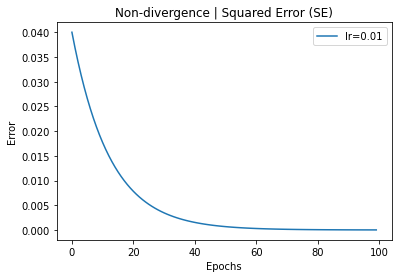

In [5]:
# User input
input= 2 #@param {type: "float"} {allow-input: true}
weight = 0.5 #@param {type: "float"} {allow-input: true}
goal_pred = 0.8 #@param {type: "float"} {allow-input: true}
alpha = 1 *  10E-3 #@param {type: "float"} {allow-input: true}

# Keep track of errors over training epochs.
errors = []

for iteration in range(100):
    pred = input * weight 
    error = (pred - goal_pred) ** 2
    delta = pred - goal_pred 
    weight_delta = delta * input
    weight -= alpha * weight_delta
    
    if iteration == 100: 
        print(f"Error: {error} Prediction {pred}")
    errors.append(error)

plt.plot(errors, label=f"lr={alpha}")
plt.title("Non-divergence | Squared Error (SE)")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend()